In [1]:
import numpy as np
import cv2

img = cv2.imread("img.png", 0)
print(type(img))
cv2.imshow("img.png", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('messigray.png', img)

<class 'numpy.ndarray'>


True

imread  读取图片为矩阵形式，格式为class 'numpy.ndarray'

imshow  调用python进程显示图片

waitkey(等待毫秒数，0为一直等待) 等待按键并获取键值，然后执行下一条语句

destroyAllWindows  关闭所有本代码打开的窗口

imwrite('文件名'，矩阵)  把矩阵写成名为XX的图片

In [2]:
import numpy as np
import cv2

img = cv2.imread('img.png', 0)
cv2.imshow('image', img)
k = cv2.waitKey(0) & 0xFF
if k == 27:  # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'):  # wait for 's' key to save and exit
    cv2.imwrite('messigray.png', img)
    cv2.destroyAllWindows()

" & 0xFF " 64位系统下所需要加的参数

27代表ESC

ord()返回的是Unicode

ord("s")代表键盘上的 s 按键

整体的功能就是等待ESC或S按键按下，判断是退出还是保存

按其他键则会略过if，不执行动作

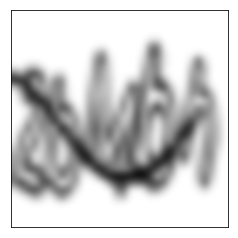

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img.png', 0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

这次用matplotlib来显示打开的图片

换汤不换药

plt.xticks([]), plt.yticks([])  表示在最终显示的图片中，隐藏了原本会显示出来的X、Y轴

In [11]:
import numpy as np
import cv2

img = cv2.imread("img.png")
px = img[10, 10]
print("pixel selected is ",px)
blue = img[10, 10, 0]
print("The blue pixel selected is", blue)

print("pixel (10,10,2) is ",img.item(10,10,2))
img.itemset((10,10,2),254)
print("pixel (10,10,2) is ",img.item(10,10,2))

pixel selected is  [255 255 255]
The blue pixel selected is 255
pixel (10,10,2) is  255
pixel (10,10,2) is  254


img[10, 10, 0] 读取蓝色通道的某个像素，关键是那个 " 0 "

img[10, 10, 2] 读取红色通道的某个像素，关键是那个 " 2 "

itemset 取代直接用 img[10, 10, 2] = 254 这种ndarray赋值操作，这里是官方给的建议

In [12]:
print (img.shape)
print (img.size)
print (img.dtype)

(32, 32, 3)
3072
uint8


顾名思义

图片形状——是?x?的矩阵呢；
图片大小——这里指32*32*3，即矩阵元素数量；
图片数据类型——不注意这个容易出bug

In [ ]:
import numpy as np
import cv2

img = cv2.imread("img.png")
copy_region = img[28:32, 25:29, 0:3]   # copy_region
print(copy_region)
img[26:30, 28:32, 0:3] = copy_region  # aim_region
print(copy_region)

复制copy_region区域的图像信息到图片中的另一个区域，注意复制出来的区域 和 去往的 目标区域 两者大小要一致

In [ ]:
import numpy as np
import cv2

img = cv2.imread("img.png")

b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))

b = img[:, :, 0]

蓝绿红通道分割

cv2.split 执行费时

b = img[:, :, 0] 执行速度更快

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('opencv_logo.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

# 有趣的变换

src - input image

top, bottom, left, right - border width in number of pixels in corresponding directions

borderType - Flag defining what kind of border to be added. It can be following types:
cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.

cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb

cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba

cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh

cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
value - Color of border if border type is cv2.BORDER_CONSTANT

In [ ]:
import cv2
import numpy as np

x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x, y))  # 250+10 = 260 => 255
print(x + y)  # 250+10 = 260 % 256 = 4

对uint8数据类型，cv2的加法和numpy加法是不同的

cv2是饱和都算成是上界的值

numpy则是饱和溢出

cv2的加法，更符合图像处理的逻辑，所以图像处理尽量使用cv2的加法